In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns


In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
def n_grams(sentence):
    return sentence.split()
master=[]
for elemento in df['Enunciado']:
    doc=nlp(elemento)
    lista=[]
    for token in doc:
        if(token.text not in nlp.Defaults.stop_words and token.lemma_ not in nlp.Defaults.stop_words and token.text.isalpha() and len(token.text)>1):
            lista+=[token.lemma_]
    master+=[lista]

In [4]:
df['tokens']=master

In [5]:
from gensim.models import Word2Vec

In [6]:
model = Word2Vec(min_count=10,
                     window=10,
                     size=20,
                     #sample=6e-5, 
                     #alpha=0.03, 
                     #min_alpha=0.0007, 
                     #negative=20,
                     workers=4,
                     sg=0,
                     hs=1)

In [7]:
model.build_vocab(sentences=df.tokens)
# model.train(df.tokens, total_examples=model.corpus_count, epochs=30, report_delay=1)

In [8]:
# model.save("w2v.model")
# print("Model Saved")

In [9]:
# max_epochs = 100

# for epoch in range(max_epochs):
#     model.train(df.tokens,
#                 total_examples=model.corpus_count,
#                 epochs=model.iter)
#     # decrease the learning rate
#     model.alpha -= 0.0002
#     # fix the learning rate, no decay
#     model.min_alpha = model.alpha

In [10]:
# model.init_sims(replace=True)
# X = model[model.wv.vocab]

In [11]:
# import umap
# import matplotlib.pyplot as plt
# %matplotlib inline

# cluster_embedding = umap.UMAP(n_neighbors=10, min_dist=0.0,
#                               n_components=2, random_state=42).fit_transform(X)

# plt.figure(figsize=(10,9))
# plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [12]:
vocab=[]
words=[]
for i in df.tokens:
    for j in i:
        try:
            vocab.append(model.wv.word_vec(j))
            if(j not in words):
                words+=[j]
        except:
            continue

In [13]:
len(words)
teste=[a*0 for a in range(0,len(words))]

In [14]:
def procura(palavra,lista):
    contador=0
    while(len(lista)>contador):
        if(lista[contador]==palavra):
            return contador
        contador+=1
    return -1

In [15]:
from numpy import linalg as LA
vectors=[]
vec=[]
for elemento in df.tokens:
    for palavra in elemento:
        indice=procura(palavra,words)
        if(indice>-1):
            vec=[]
            vec.append(model.wv.word_vec(palavra))
            for cada in vec:
                teste[indice]=LA.norm(cada, -2)
    vectors.append(teste)
    teste=[a*0 for a in range(0,len(words))]

In [16]:
# vec = []
# vectors = []

# for i in df.tokens:
#     for j in i:
#         try:
#             vec.append(model.wv.word_vec(j))
#         except:
#             continue
#     vectors.append(vec)
#     vec = []

In [17]:
# tam = 0

# for i in range(0, len(vectors)):
#     if(tam < len(vectors[i])):
#         tam = len(vectors[i])

In [18]:
# zeros = np.zeros(1)
# zeros

In [19]:
# for i in range(0, len(vectors)):
#     while(len(vectors[i]) < tam):
#         vectors[i].append(zeros)

In [20]:
# from numpy import linalg as LA

# vec = []
# vectors_norm = []

# for i in vectors:
#     for j in i:
#         vec.append(LA.norm(j, -2))
#     vectors_norm.append(vec)
#     vec = []

In [21]:
X=vectors
y=df['Contexto'].values

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
pipeline = RandomForestClassifier(random_state=42)

In [32]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(pipeline,X,y,cv=10)

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [33]:
print(metrics.confusion_matrix(y,y_pred))

[[ 24   1   0   0   0   2   0   0   0   0   0   1   6   0   1   0   0   0
    0   0   0   0   0   0]
 [  1  84   0   1   0   3   0   0   0   0   1   1  17   0   1   0   0   0
    6   0   3   0   0   2]
 [  0   0   5   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  11   0   0   0   0   0   0   1   5   0   3   0   0   0
    1   0   0   0   0   0]
 [  0   0   0   0   0  73   0   0   0   2   0   0   3   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   2   0   0   0   4  29   0   0   0   0   0   4   0   0   0   3   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  28   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0  31   0   0   2   1   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   1   0   1   0   7   0   0   2   0   0   0   0   0
    0   0   0   0

In [34]:
print(metrics.classification_report(y,y_pred))

                 precision    recall  f1-score   support

       Bancário       0.83      0.69      0.75        35
      Comercial       0.69      0.70      0.69       120
  Computacional       1.00      0.83      0.91         6
        Consumo       0.94      0.94      0.94        16
    Data e hora       1.00      0.52      0.69        21
        Escolar       0.86      0.92      0.89        79
        Esporte       1.00      0.69      0.82        42
Filmes e séries       0.93      0.93      0.93        30
         Física       0.84      0.86      0.85        36
      Geografia       0.64      0.64      0.64        11
        Imposto       0.80      0.80      0.80         5
          Jogos       0.89      0.77      0.83        96
     Matemático       0.76      0.93      0.84       261
  Meio ambiente       1.00      0.89      0.94        18
         Outros       0.75      0.73      0.74        59
       Pesquisa       1.00      0.89      0.94        18
         Pessoa       0.85    

In [35]:
print(metrics.accuracy_score(y,y_pred))

0.8210526315789474


In [36]:
from sklearn.metrics import confusion_matrix

mat_etc = confusion_matrix(y, y_pred)
row_sums = mat_etc.sum(axis=1, keepdims=True)

In [37]:
norm_conf_mx = mat_etc / row_sums

In [38]:
labels = ['Bancário','Comercial','Computacional','Consumo','Data e hora','Escolar','Esportes',
         'Filmes e séries','Física','Geogragia','Imposto','Jogos','Matemático',
          'Meio ambiente','Outros','Pesquisa','Pessoa','População','Produção',
         'Química','RH','Saúde','Segurança','Trânsito']

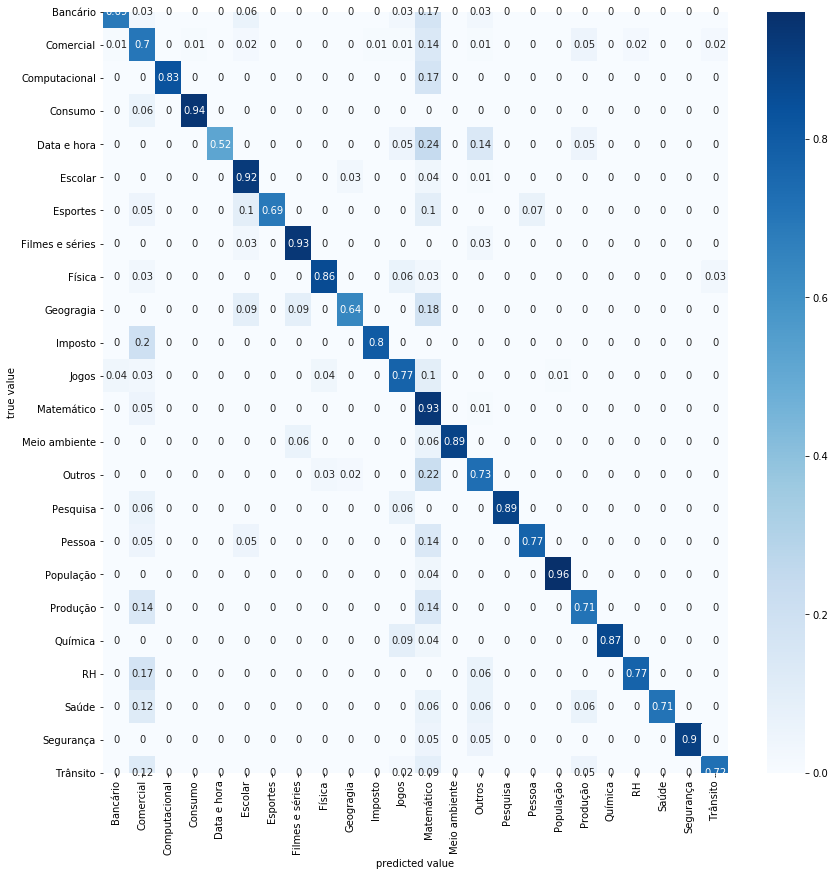

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),
                         columns=labels, 
                         index=labels), 
            annot=True, 
            fmt='g', 
            cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');